# Exploration of Prosper Loan Data
## by Milica Nesic



## Investigation Overview

My focus was on exploring how Loan Amount, Term of Loan (duration of the loan) and Prosper Rating (the loan risk) affect the Borrower Rate.

## Dataset Overview

ProsperLoanData dataset contains data from almost 85000 loans and 81 loan variables in the US for the period from November 2005 until March 2014. For the purpose of my exploration, I focused on the data after July 2009, since the categorization of the data changed for this point onwards. My focus was on exploring how Loan Amount, Term of Loan (duration of the loan) and Prosper Rating (the loan risk) affect the  Borrower Rate.

In [1]:
# importing all packages, setting plots to be embedded inline, and setting pandas to show all the columns of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sqlite3 as sql
%matplotlib inline
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset into loans data frame
loans = pd.read_csv("prosperLoanData.csv", parse_dates=["ListingCreationDate"])

In [3]:
#deleting duplicates
loans.drop_duplicates(subset="ListingKey", inplace=True)

In [4]:
#excluding all the data before August 2009, because a lot of data categorizing has changed after July 2009
loans = loans[loans["ListingCreationDate"] >= "2009-08-01"]

In [5]:
#excluding the data where the category of the loan is unknown
loans = loans[~(loans["ListingCategory (numeric)"] == 0)]

In [6]:
loans.Term.unique()

array([36, 60, 12], dtype=int64)

In [7]:
#changing Term and ListingCategory variables datatype to category
loans["Term"] = loans["Term"].astype("category")
loans["ListingCategory (numeric)"] = loans["ListingCategory (numeric)"].astype("category")

In [8]:
categories = ["HR", "E", "D", "C", "B", "A", "AA"]
ratings = pd.api.types.CategoricalDtype(categories=categories, ordered=True)
loans["ProsperRating (Alpha)"] = loans["ProsperRating (Alpha)"].astype(ratings)

## Borrower Rate Distribution

From the histogram, we can notice that the distribution of Borrower Rate is multimodal and slightly right skewed. The box plot shows us there are no outliers, with minimum and maximum values at 0.02 and 0.36, respectively. There is a prominent peak around 32% which consists of loans with low ProsperRating (E or lower) and low approved amount.

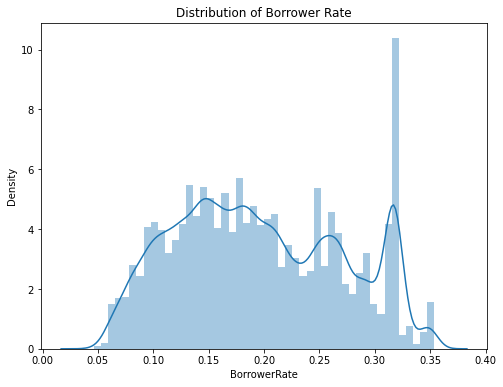

In [9]:
plt.figure(figsize=(8, 6))
sb.distplot(loans.BorrowerRate)
plt.title("Distribution of Borrower Rate");

## Distribution of Loan Amount

We can notice that the distribution of Loan Amount is multimodal (with three promintent peaks) and strongly skewed to the right. When we look at the box plot of the Loan Amount, we can notice that the median is around 7500, which means half of the data falls below 7500, and 75% of data falls below 13500 dollars. We can also notice some outliers at the higher values of the x axis. These outliers belong to a high prosper rating loans with borrower rate lower than 15%.

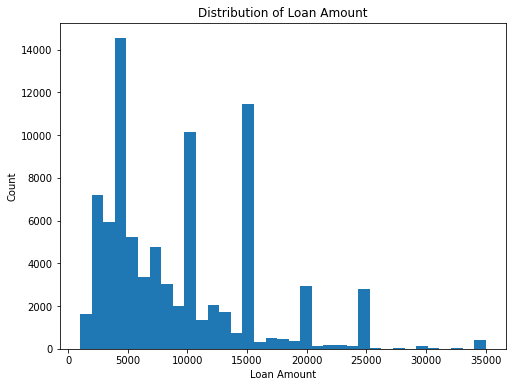

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(x="LoanOriginalAmount", data=loans, bins=35)
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.title("Distribution of Loan Amount");


## Other variables

Categorical variables used for explorations were Term ListingCategory (numeric) and ProsperRating (Alpha) which have the following levels:

(lowest) ——> (highest) <br>

Term of loan in months: 12, 30, 60 <br>
Prosper Rating - loan risk: HR, E, D, C, B, A, AA

Listing Category - goes from 1 to 20, with most important categories being:
- 1 - Debt Consolidation
- 2 - Home Improvement
- 3 - Business
- 7 - Other

## Borrower Rate vs. Loan Amount

We can notice is a negative correlation between the two variables (-0.41), however the relationship does not seem to be linear. Interesting to see is, which has already been previously mentioned, that most of the loans lay below 20000 dollars, and that there aren't that many loans with high Borrower rate as the Loan Amount decreses.

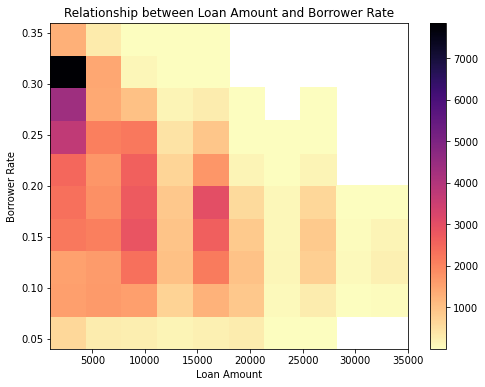

In [11]:
plt.figure(figsize=(8, 6))
plt.hist2d(x="LoanOriginalAmount", y="BorrowerRate", data=loans, cmap="magma_r", cmin=0.01);
plt.colorbar()
plt.xlabel("Loan Amount")
plt.ylabel("Borrower Rate")
plt.title("Relationship between Loan Amount and Borrower Rate");

## Borrower Rate and Loan Amount vs. Term and Proper Rating


Tthere is a negative correlation between BorrowerRate and ProsperRating. Taking into account Term as well, we can conclude that the better the ProsperRating and the shorter the Term - the lower the BorrowerRate. On the other hand, positive correlation between LoanAmount and BorrowerRate and ProsperRating indicates that as the BorrowerRate increases and the Term prolongs, the higher amounts of loan are approved, on average.

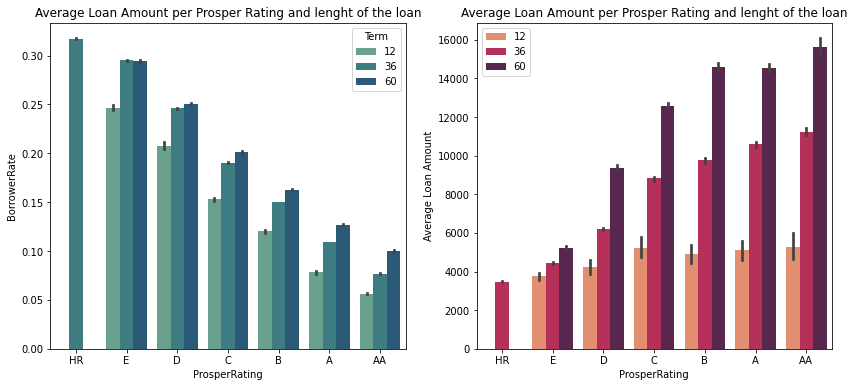

In [12]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sb.barplot(data=loans, x="ProsperRating (Alpha)", y="BorrowerRate", hue="Term", palette="crest");
plt.title("Average Loan Amount per Prosper Rating and lenght of the loan")
plt.xlabel("ProsperRating")

plt.subplot(1, 2, 2)

sb.barplot(data=loans, x="ProsperRating (Alpha)", y="LoanOriginalAmount", hue="Term", palette="rocket_r");
plt.title("Average Loan Amount per Prosper Rating and lenght of the loan")
plt.ylabel("Average Loan Amount")
plt.xlabel("ProsperRating")
plt.legend(loc="upper left");

## Four variable grid

Looking at all the variables plotted together using FacetGrid, we can notice that in conditions of longer Terms and lower ProsperRatings low amount Loans are approved with higher rates As the better prosper ratings improve, and the Terms shorten we see that the data falls lower on the y axis and it spreads along the x axis. This indicates that higher loan amounts are approved with lower rates.

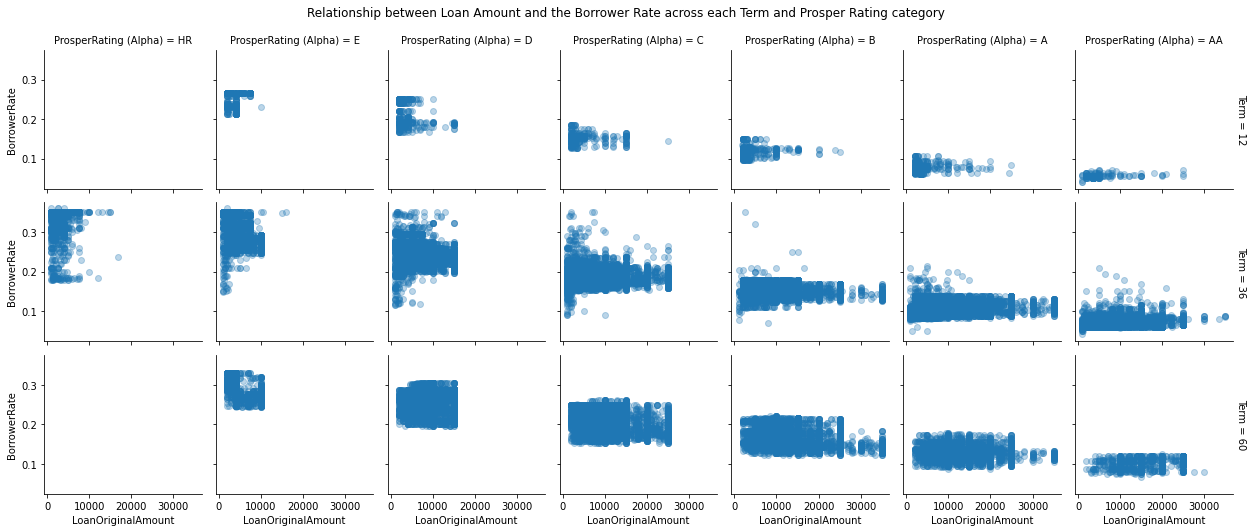

In [13]:
g = sb.FacetGrid(data = loans, col = 'ProsperRating (Alpha)', row = 'Term', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha=0.3)
g.fig.subplots_adjust(top=0.90)
g.fig.suptitle("Relationship between Loan Amount and the Borrower Rate across each Term and Prosper Rating category");